In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/SaraHadou/Datasets/main/churn_modeling.csv"

In [ ]:
# import important packages

import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [ ]:
# Read churn_modeling.csv file
churn_dataset =  pd.read_csv(DATA_PATH)
churn_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Shape of churn_dataset
churn_dataset.shape

(10000, 14)

In [ ]:
# Information about churn_dataset
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Statistics information about churn_dataset
churn_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Preprocessing:

In [ ]:
# OHE for Geography and Gender features 
geography = pd.get_dummies(churn_dataset["Geography"])
gender = pd.get_dummies(churn_dataset["Gender"])
churn_dataset = pd.concat([geography, gender, churn_dataset], axis=1)

In [ ]:
print(churn_dataset.shape)
churn_dataset.head()

(10000, 19)


,France,Germany,Spain,Female,Male,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Drop useless columns 
churn_dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

In [ ]:
print(churn_dataset.shape)
churn_dataset.head()

(10000, 14)


,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Split the churn_dataset to variables d target
X = churn_dataset.iloc[:, :-1].values
y = churn_dataset.iloc[:, -1].values

In [ ]:
print(X.shape)
print(y.shape)

(10000, 13)
(10000,)


In [ ]:
# Spiliting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=42)
print(X_train.shape)
print(y_train.shape)

(8000, 13)
(8000,)


## Modeling:

In [ ]:
# Create Sequential Model (ANN using Keras)
model = keras.models.Sequential()

# Adding our layers
model.add(layers.BatchNormalization(input_dim=13))
model.add(layers.Dense(64, activation='relu', name='hidden_1'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu', name='hidden_2'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 13)               52        
 ormalization)                                                   
                                                                 
 hidden_1 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 hidden_2 (Dense)            (None, 16)                1040      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 2,261
Trainable params: 2,107
Non-trainabl

In [ ]:
# Compiling the ANN
model.compile(optimizer='sgd',
              loss= 'binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("churn_model.h5", 
                                                save_best_only=True)

# Creat early stopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=24,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
267/267 [==============================] - 2s 3ms/step - loss: 0.5036 - accuracy: 0.7748 - val_loss: 0.4442 - val_accuracy: 0.8087
Epoch 2/100
267/267 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.8112 - val_loss: 0.4141 - val_accuracy: 0.8181
Epoch 3/100
267/267 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8191 - val_loss: 0.4002 - val_accuracy: 0.8256
Epoch 4/100
267/267 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8238 - val_loss: 0.3907 - val_accuracy: 0.8350
Epoch 5/100
267/267 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8258 - val_loss: 0.3823 - val_accuracy: 0.8444
Epoch 6/100
267/267 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8345 - val_loss: 0.3737 - val_accuracy: 0.8444
Epoch 7/100
267/267 [==============================] - 1s 3ms/step - loss: 0.3879 - accuracy: 0.8347 - val_loss: 0.3688 - val_accuracy: 0.8469

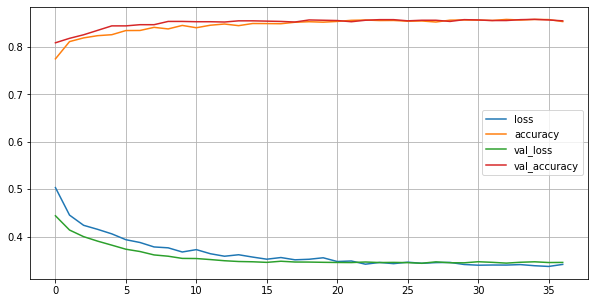

In [ ]:
# Plot training vs. validation loss and accuracy
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10, 5))
plt.grid(True)
plt.show()

In [ ]:
# Predicting the test set
prediction = model.predict(X_test)
prediction = (prediction > 0.5)
prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
# Evaluate the model 
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8660


[0.33979561924934387, 0.8659999966621399]